### This is a group assignment on solving a regression problem
#### Group members are:
**1. Monica Mbabazi** 

**2. Jupiter Kabahita**

**3. Eric Karuiki**

**AIM**
>The aim of this analysis is to predict the house prices based on the 80 explanatory variables / features from the data provided describing almost every aspect of residential homes.

In [1951]:
#Let's import all the necessary libraries to be used in this analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# for plotting
#for plots to be embedded directly within the notebook use the code below
%matplotlib inline 
import seaborn as sns #data visualization library based on matplotlib
import missingno as msno #for visualizing patterns of missing values in your data
from folium.plugins import HeatMap, HeatMapWithTime
import scipy.stats as stats # Imports the entire scipy.stats (all distributions)
# Import the skew-normal distribution and skewness test from scipy.stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
#import geopandas as gpd
import os # for accessing directory structures
# let's us remove all the uncessary warnings from our cells
import warnings
warnings.filterwarnings('ignore')

# Input data files to be used are available in "../input/" directory.
# running the below command lists all the availabe files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


/kaggle/input/group-assignment-ace-2020/sample_submission.csv
/kaggle/input/group-assignment-ace-2020/data_description.txt
/kaggle/input/group-assignment-ace-2020/test.csv
/kaggle/input/group-assignment-ace-2020/train.csv


>From the above output, it shows that we have four files in our current directory. For this analysis we shall train our model using the train.csv and test its performance on the test.csv data.

> The .txt file is a data description file, describing each column of the data and sample_submission.csv shows the format of how the final submission file should be.

**Task 1: Loading and Reading the data**
>Now let us load and read in our data with the code below and assign it to new names. Here we use the "pd.read_csv" since the files are in csv format. CSV files are comma separated files.


In [1952]:
#Loading both the training dataset and the test dataset using read_csv 
train=pd.read_csv("/kaggle/input/group-assignment-ace-2020/train.csv")
test=pd.read_csv("/kaggle/input/group-assignment-ace-2020/test.csv")

**Task 2:  Data Exploration**
>Data exploration is the initial step in data analysis, where users explore a large data set in an unstructured way to uncover initial patterns, characteristics, and points of interest.

>During data exploration,a data scientist can use a combination of manual methods and automated tools such as data visualizations, charts, and initial reports to understand what is in a dataset and the characteristics of the data.

>This process makes deeper analysis easier because it can help target future searches and begin the process of excluding irrelevant data points. In any situation where you have a massive set of information, data exploration can help cut it down to a manageable size and focus efforts to optimize your analysis.

>By taking the time to perform a real exploration of your data along with visualization tools, you can also start finding correlations, patterns, and determine if a certain path is worth researching, or if the information is less usable.

>Data exploration can also assist by reducing work time and finding more useful and actionable insights from the start alongside presenting clear paths to perform better analysis. https://www.sisense.com/glossary/data-exploration/
- Let's try to understand the size, structure an characteristics of our data and also patterns in our data to guide us on how to prepare and process our data for machine learning.

>Let’s use the pandas sample() method to randomly display 5 rows of our DataFrame, just to make sure we were able to load the dataset properly:

In [1953]:
#Lets randomly display 5 rows/observations of our training dataset.
#The sample()method is similar to head()method but head()doesnot randomly display the rows.
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
646,647,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,98300
1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1205,1206,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
907,908,50,RL,86.0,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,250000


In [1954]:
#Lets randomly display 5 rows/observations of our test dataset
test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1446,2907,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
63,1524,20,RL,60.0,10950,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
705,2166,20,RL,65.0,9750,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1208,2669,20,RL,102.0,11660,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,New,Partial
517,1978,60,RL,112.0,16451,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


>From the output of the sample()function, we can see that Saleprice column is the target variable and since it has continuous values i.e. which cannot be classified into specific categories, the problem is a supervised regression one.Some columns have missing values so shall do data cleaning.

In [1955]:
##Now let's drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

`Data dimensions`
>We need to know how much data you have both in terms of row and column number

>This will give an insight on how much time the algorithm might take to train, algorithms take long to train on data with many rows and fewer rows may lead to underfitting of the model. Too many features/columns may cause overfitting of some algorithms due to the curse of dimensionality.

>Too many features/columns may cause overfitting of some algorithms due to the curse of dimensionality(https://mc.ai/confronting-the-curse-of-dimensionality).

>Let’s also use pandas .shape attribute to view the number of samples/rows and features we’re dealing with at this stage:

In [1956]:
#let gets the númber of samples/rows and the columns.features in each dataset
print('train Data: \n')
print(f"Rows: {train.shape[0]}, Columns: {train.shape[1]}")
print('\ntest Data: \n')
print(f"Rows: {test.shape[0]}, Columns: {test.shape[1]}")

train Data: 

Rows: 1460, Columns: 80

test Data: 

Rows: 1459, Columns: 79


> From the above output on data dimensions, we can tell that we are working with large datasets of almost the equal sizes in terms of row and column numbers. This gives us an ideal that we may need to do feature reduction to have managable data for machine learning models. It also gives us an insight on which models to use because some models perform better on small data than other and the reverse is true.

In [1957]:
#Lets display the column names in our data
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

`Data Type For Each Attribute`

>Understanding the type of each attribute is very important. In case of the presence of strings, we may need to convert them to floats or integers.

> Let's use the info() insteady of dtypes methods since info method gives more detailed information in addition to data type.

In [1958]:
#lets get the information for each column of the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [1959]:
#lets get the information for each column of the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non

> Based on the output above, we can tell that some of the columns in our data are numeric and categorical. We can also tell that our two datasets contain missing values. This tells me that we need to do some data cleaning.

`Descriptive Statistics`
>Descriptive statistics can give us great insight into the shape of each attribute. helps you to understand your data and is a very important part of Machine Learning. This is due to Machine Learning being all about making predictions (https://machinelearningmastery.com/understand-machine-learning-data-descriptive-statistics-python).

>This will help us understand better what the data is trying to distributed, which will result in an overall better machine learning model and understanding.

>Central tendency which in this case is indicated by 'mean'determines the tendency for the values of your data to cluster around its mean.

>interquartile range (IQR)and standard deviation measure the amount of spread or variability within your data.

>By default the describe() function on the Pandas lists 8 statistical properties of each attribute as indicated in the output below.
- Since some columns of our data have numeric values and others have cateorical values, we think it is a better ideal to get descriptive statistics of numeric and categorical columns separate.

In [1960]:
#lets get the numerical columns

print(train.dtypes[train.dtypes != 'object'].index, '\n')
print("Number of numeric columns: ", len(train.dtypes[train.dtypes != 'object'].index))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 

Number of numeric columns:  37


In [1961]:
#Lets get a few numeric columns
numeric=train.dtypes[train.dtypes != 'object'].index
train[numeric].sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1409,60,46.0,20544,7,6,1986,1991,123.0,0,0,...,364,63,0,0,0,0,0,11,2008,215000
337,20,70.0,9135,7,5,2002,2003,113.0,810,0,...,192,74,0,0,0,0,0,12,2008,214000
1377,50,60.0,10998,5,5,1941,1960,0.0,408,420,...,0,68,0,0,0,0,0,7,2009,117000
926,60,93.0,11999,8,5,2003,2004,340.0,0,0,...,104,100,0,0,0,0,0,5,2007,285000
1297,180,35.0,3675,6,5,2005,2006,82.0,547,0,...,0,44,0,0,0,0,0,6,2006,140000


In [1962]:
#lets get the categorical columns

print(train.dtypes[train.dtypes == 'object'].index, '\n')
print("Number of categorical columns: ", len(train.dtypes[train.dtypes == 'object'].index))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object') 

Number of categorical columns:  43


In [1963]:
#Lets randomly display 5 categorial columns in our data set
categorical=train.dtypes[train.dtypes == 'object'].index
train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
427,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
910,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
471,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1206,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
92,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [1964]:
#lets generate descriptive statistics of the train dataset
#lets first, for the numeric columns
train.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [1965]:
#Lets also generate descriptive statistics for the categorical columns
train.describe(exclude=[np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [1966]:
#lets generate descriptive statistics of the test dataset
#lets first, for the numeric columns
test.describe(exclude='object')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [1967]:
#lets generate descriptive statistics for categorical columns of the test data
test.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


`Exploration of the target variable`
> Lets explore more the target variable: Saleprice
- We shall mainly look at the discriptive statistics and Distribution of the target varible.

**Distribution of the target variable**

- We shall look at the Skewedness and Kurtosis: Skewness and Kurtosis are two moment based measures that will help you to quickly calculate the degree of departure from normality.

**Skewedness**
>Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. Many machine learning algorithms assume a Gaussian distribution.

>Skewed data is common in data science; and this is simply the degree of distortion from a normal distribution. So,knowing that an attribute has a skew may allow us to perform data preparation to correct the skew and later improve the accuracy of your models (https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model, https://machinelearningmastery.com/how-to-develop-an-intuition-skewed-class-distributions/).

>The data can be either positive skewed(when the curve is more deviated towards the right) or negatively skewed (the curve is more deviated towards the left). 

>If skewness value lies above +1 or below -1, data is highly skewed it is recommended to fix the skewness to make good decisions by the model.A log transformation can help to fit a very skewed distribution into a Gaussian one. It and can be used to reduce right skewness.If the tail is to the left of data, then it is called left skewed data or negatively skewed data. Common transformations include square , cube root and logarithmic.

**Data Kurtosis**
>Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

>If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, maybe wrong data entry or other things. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results.https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm, https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa.
- The histogram is an effective graphical technique for showing both the skewness and kurtosis of data set.
- We shall use the logarithmic transformation in this analysis to correct the skewedness and kurtosis in our data.


In [1968]:
#descriptive statistics summary of the target variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

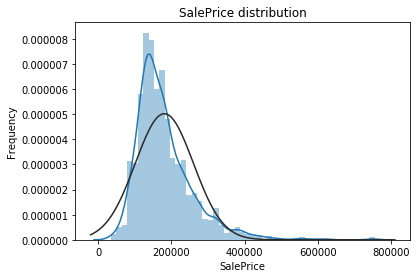

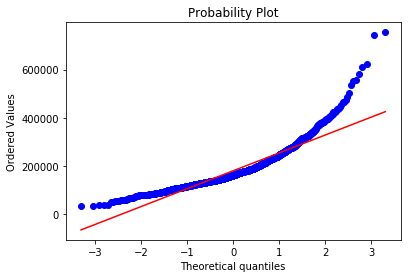

Skewness: 1.882876
Kurtosis: 6.536282


In [1969]:
#Density Plot to look at the distribution of our data
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
#lets check the level of skewedness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

> According to the above plots, target variable is right skewed(positive skewness) and show peakedness. As (linear) models fits better on normally distributed data , we require proper transformation. Here we shall use the log transformation to correct the skewedness.

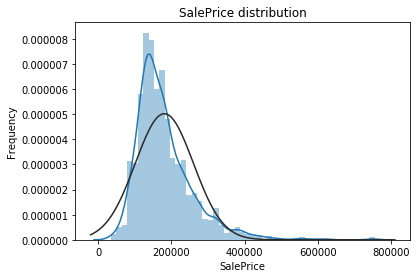

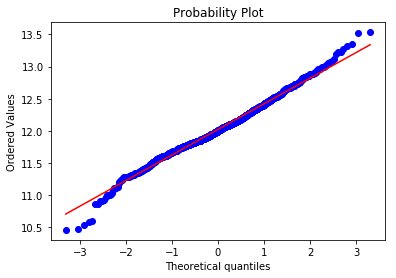



Skewness: 0.121335
Kurtosis: 0.809532


In [1970]:
#lets log transform the data

train['SalePrice_Log'] = np.log(train['SalePrice'])

#now the data is normally distributed, lets plot again to see.
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice_Log']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice_Log'], plot=plt)
plt.show()
print('\n')
print("Skewness: %f" % train['SalePrice_Log'].skew())
print("Kurtosis: %f" % train['SalePrice_Log'].kurt())

**Task 3: Data preparation and preprocessing**

`Data cleaning during machine learning`
>In the context of data science and machine learning, data cleaning means filtering and modifying your data such that it is easier to explore, understand, and model.

>Cleaning your data should be the next step in your Machine Learning (ML) workflow after data exploration. Without clean data you’ll be having a much harder time seeing the actual important parts in your exploration. 
- Better data beats fancier algorithms.
- In other words... garbage in gets you garbage out. Thats why we need to clean our data.
- In fact, if you have a properly cleaned dataset, even simple algorithms can learn impressive insights from the data!

>Obviously, different types of data will require different types of cleaning.

`How can data pre-processing be performed?`
- Below are some of the basic pre — processing techniques that can be used to convert raw data.

**Conversion of data:** As we know that Machine Learning models can only handle numeric features, hence categorical and ordinal data must be somehow converted into numeric features.

**Remove Unwanted observations**
>The first step to data cleaning is removing unwanted observations from your dataset.
- This includes duplicate or irrelevant observations.
>Duplicate observations most frequently arise during data collection.

>Irrelevant observations are those that don’t actually fit the specific problem that you’re trying to solve.

**Fix Structural Errors**
>The next bucket under data cleaning involves fixing structural errors.

>Structural errors are those that arise during measurement, data transfer, or other types of "poor housekeeping."
- For instance, you can check for typos or inconsistent capitalization.This is mostly a concern for categorical features. After replacing typos and inconsistent capitalization, the class distribution becomes much cleaner.

>Finally, check for mislabeled classes, i.e. separate classes that should really be the same.
- e.g. If ’N/A’ and ’Not Applicable’ appear as two separate classes, you should combine them.
**Filter Unwanted Outliers**
>Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models.

>In general, if you have a legitimate reason to remove an outlier, it will help your model’s performance.

>However, outliers are innocent until proven guilty. You should never remove an outlier just because it’s a "big number or small number."

>There must be a good reason for removing an outlier, such as suspicious measurements that are unlikely to be real data.

**Handle Missing Data**
>Missing data is a deceptively tricky issue in applied machine learning.

>You cannot simply ignore missing values in your dataset. You must handle them in some way for the very practical reason that most algorithms do not accept missing values.

`There are 2 most commonly recommended ways of dealing with missing data:`

 - **Dropping** observations that have missing values

 - **Imputing** the missing values based on other observations

>Dropping missing values is sub-optimal because when you drop observations, you drop information.
 - The fact that the value was missing may be informative in itself.
 - In the real world, you often need to make predictions on new data even if some of the features are missing!
 -  If more than 50% values in any particular column are missing then we can exclude that column. This will allow us to work faster and our data set is large enough that it will still be meaningful without them.

**Imputing missing values:** Imputation is a method to fill in the missing values with estimated ones.

`There are many options we could consider when replacing a missing value, for example:`
- A constant value that has meaning within the domain, such as 0, distinct from all other values.
- A value from another randomly selected record.
- A mean, median or mode value for the column.
- A value estimated by another predictive model.
- Multiple Imputations.
- Regression Imputation.
- Stochastic Regression Imputation.
https://www.hindawi.com/journals/mpe/2015/538613/

>Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data/nulls for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.https://towardsdatascience.com/data-preparation-and-exploration-5e09b92cf00e

>Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values https://machinelearningmastery.com/handle-missing-data-python/

- If we have many missing values, we don’t want to proceed into their deletions because that would lead to a loss of a ton of data which would influence the predictive model’s performance. In this case we would either replace the values with the median/mean/model or/and add another column that shows if the other variable has a missing value or not.

#### Remember the quality of your inputs decide the quality of your output.
*The first thing we shall do is to count how many missing values we have in our dataset and try to visualize their distributions.* 

In [1971]:
#First, let us check the missing values in our dataset using df.isnull() command:
#We also use Pandas DataFrame method sum() to calculate the number of null values in each column.
null_counts = train.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
SalePrice_Log      0
Length: 81, dtype: int64


> Based on the above output, we notice some columns have missing values and others have 0 missing values.

> To get more insight on how much missing values does our data contain, we can only print columns that contain missing values in our data set. This is shown in the code below:

In [1972]:
##Lets print only columns with missing values in a descending order
print('train Data: \n')
na_count = train.isna().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
print(na_count[na_count>0].count())
print(na_count[na_count>0])

print('\ntest Data: \n')
na_count = test.isna().sum().sort_values(ascending = False)
percent = (test.isnull().sum() / test.isnull().count()).sort_values(ascending = False)
print(na_count[na_count>0].count())
print(na_count[na_count>0])

train Data: 

19
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

test Data: 

33
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageFinish      78
GarageYrBlt       78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsm

In [1973]:
# Lets include also the % of missing data to better understand how much data is missing
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
print(missing_data.head(20))
print('\ntest data:\n')
total = test.isnull().sum().sort_values(ascending = False)
percent = (test.isnull().sum() / test.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
print(missing_data.head(25))

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageType       81  0.055479
GarageQual       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
RoofStyle         0  0.000000

test data:

              Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageCond       78  0.053461
GarageFinish     78  0.053461
GarageYrBlt      78  0.053461
GarageQual       78  0.053461
GarageType       76  0.0520

>We can visualize patterns of missing values in our data using missingno and the heatmap to see the location of missing values in our data as shown in the two figures below:

These are plots for the train data indicating the patterns of missing values


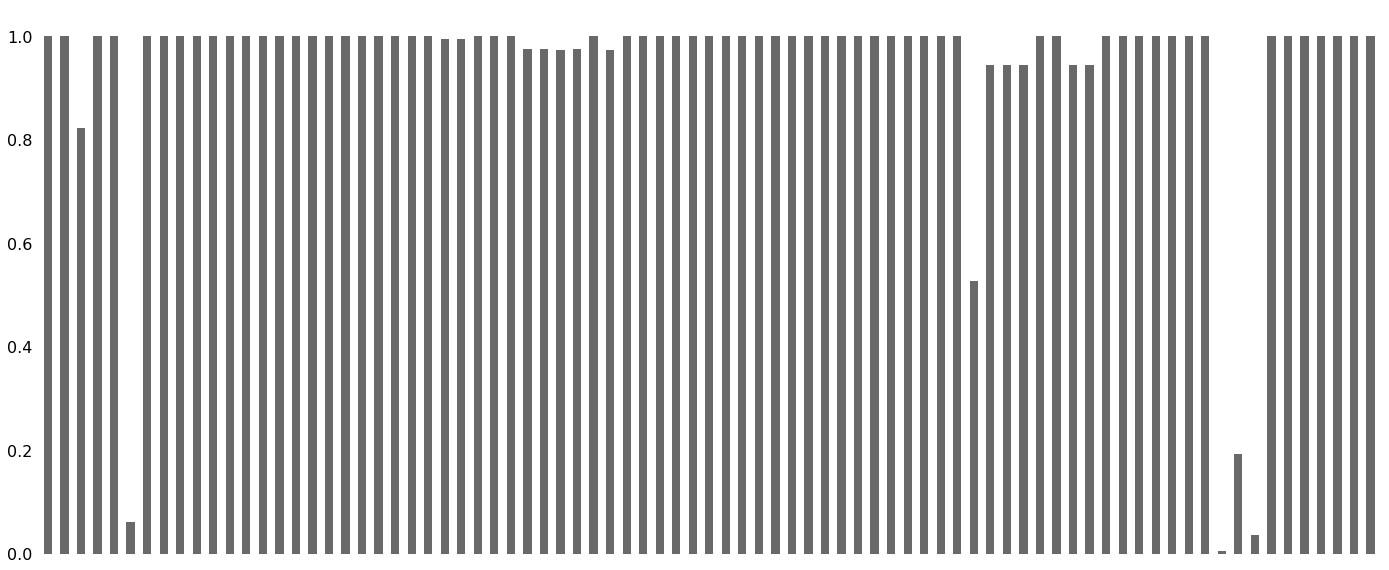

In [1974]:
##Visualizing the patterns of the missing values in our data using 'missingno'
print('These are plots for the train data indicating the patterns of missing values')
msno.bar(train);

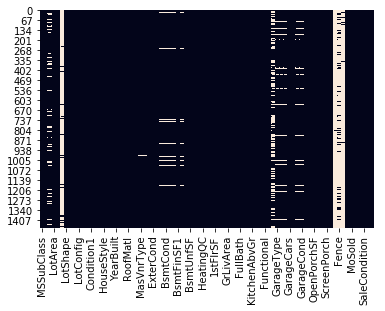

In [1975]:
#Heatmap to visualize the location of missing values.
sns.heatmap(train.isnull(), cbar=False)

These are plots for the test data indicating the patterns of missing values


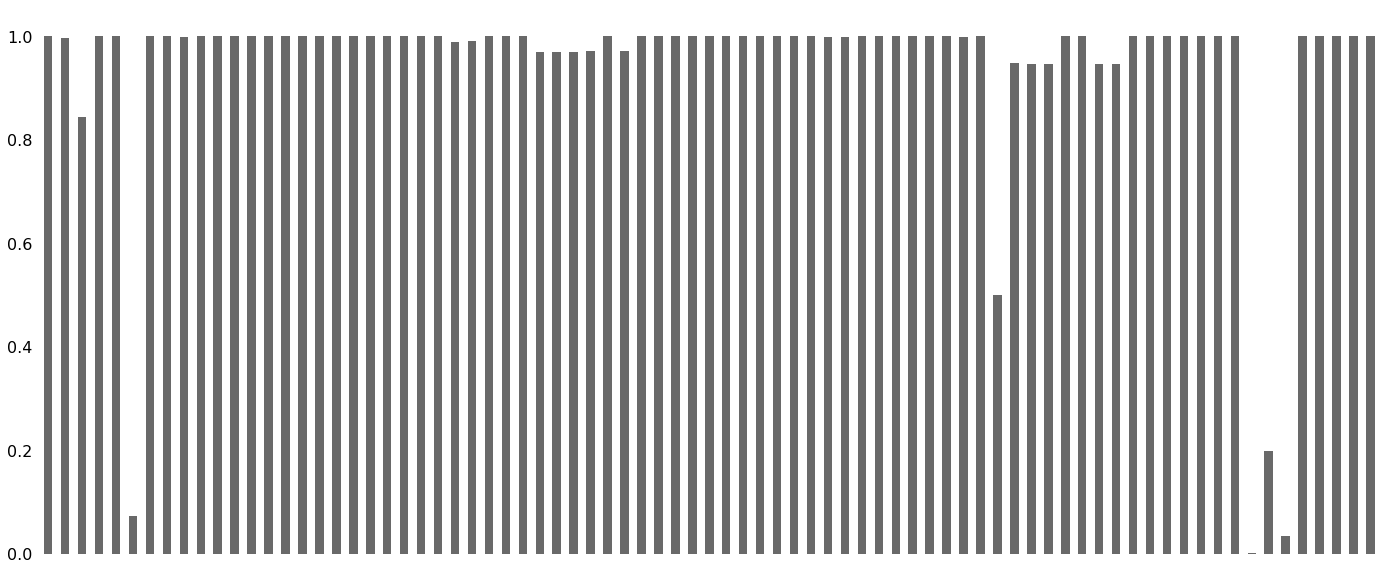

In [1976]:
#Visualizing patterns of missing values in the test data
print('These are plots for the test data indicating the patterns of missing values')
msno.bar(test);

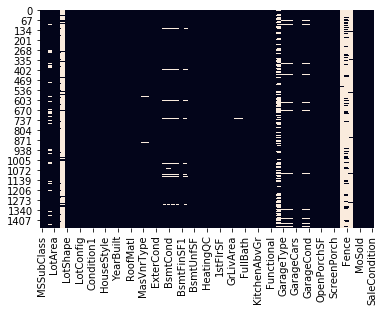

In [1977]:
#Heatmap to visualize the location of missing values.
sns.heatmap(test.isnull(), cbar=False)

`Duplicate enteries in the dataset`
>One of the common data cleaning tasks is to make a decision on how to deal with duplicate rows in a data frame.

>The df.duplicated() is used to find the total duplicate entries in our dataframe. In the drop_duplicates command above, keep='first' option allows us to keep the first occurrence of the row values while removing all the subsequent occurrences.

In [1978]:
# Select duplicate rows except first occurrence based on all columns
print('train data: \n')
duplicateRows= train[train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRows.shape)
print('\ntest data: \n')
duplicateRows= test[test.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRows.shape)

train data: 

Total Duplicate Rows except first occurrence based on all columns are :
(0, 81)

test data: 

Total Duplicate Rows except first occurrence based on all columns are :
(0, 79)


> Based on the results above of the duplicated() function and outputs in the Exploration step, we can conclude that our data has no duplicated rows. So we shall only deal with missing values and converting categorical values to numeric in this step of data cleaning.

>If the data had duplicate entries, then we would need to drop them by running the following command:-
- train.drop_duplicates(keep='first',inplace=True)

`Let's clean our data by handling missing values.`

**Imputing missing values**
- Based on feature description provided, following features if has NA means it's absent("None").
>This tells us that a lot of the nan entries are not actually missing values. So,let's first correct this.

In [1979]:
#Let's correct these are columns with meaningful values accoording to the description file.
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','MSSubClass'):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [1980]:
# Lets check again to see the missing values in our two datasets after correction.
def missdata(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    
    return missing_data.head(20)

In [1981]:
print('train Data: \n')
print(missdata(train))
print('\n test Data: \n')
print(missdata(test))

train Data: 

              Total   Percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
BsmtFinSF1        0  0.000000
BsmtFinSF2        0  0.000000
BsmtUnfSF         0  0.000000
RoofStyle         0  0.000000
Foundation        0  0.000000
ExterCond         0  0.000000
ExterQual         0  0.000000
MasVnrType        0  0.000000
Exterior2nd       0  0.000000
Exterior1st       0  0.000000
RoofMatl          0  0.000000

 test Data: 

              Total   Percent
LotFrontage     227  0.155586
GarageYrBlt      78  0.053461
BsmtCond         45  0.030843
BsmtExposure     44  0.030158
BsmtQual         44  0.030158
BsmtFinType1     42  0.028787
BsmtFinType2     42  0.028787
MasVnrArea       15  0.010281
MSZoning          4  0.002742
Utilities         2  0.001371
BsmtHalfBat

These are plots for the train data indicating the patterns of missing values


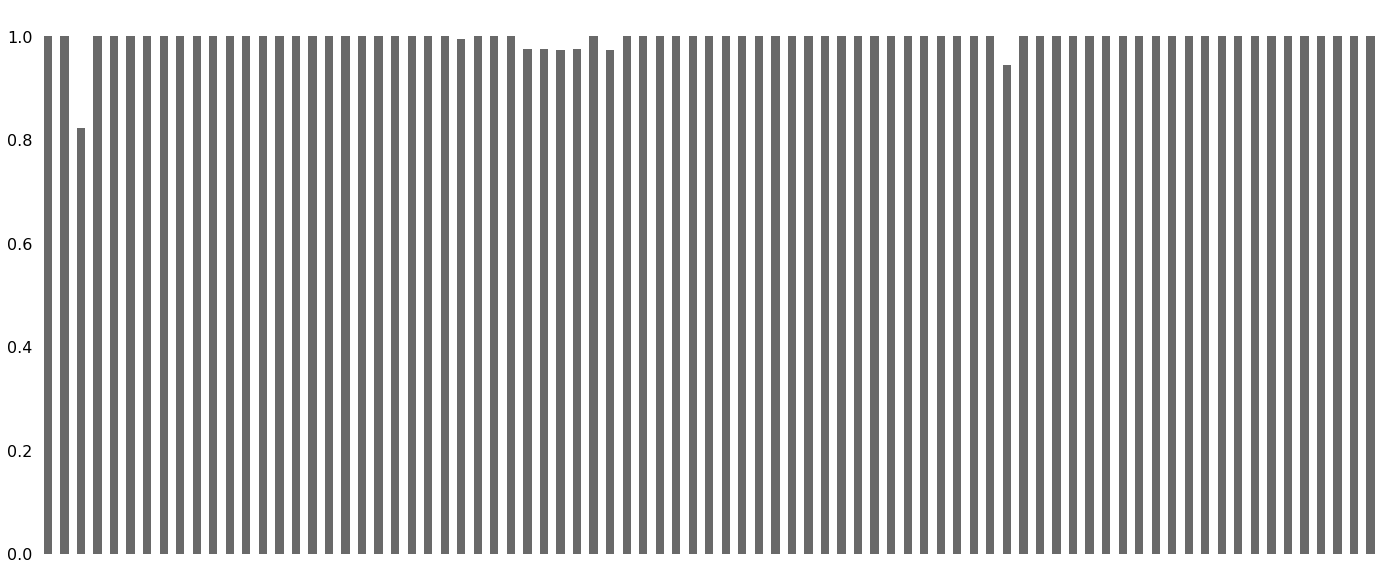

In [1982]:
## Lets do some visaulisation of the missing data now
print('These are plots for the train data indicating the patterns of missing values')
msno.bar(train);

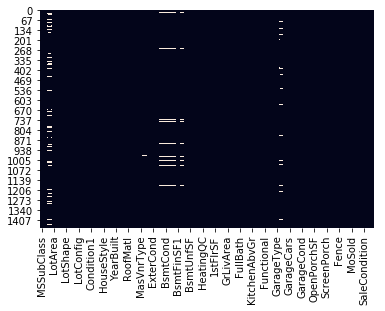

In [1983]:
#Heatmap to visualize the location of missing values.
sns.heatmap(train.isnull(), cbar=False)

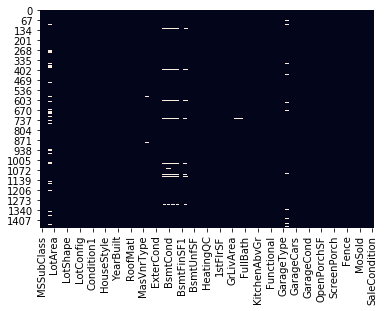

In [1984]:
#lets also have a look on the test data
sns.heatmap(test.isnull(), cbar=False)

>Based on the above plots, we see that missing values reduced after correction based on the description file. 
- We can now look at columns that still have missing values and imput their values accordingly.

>In this analysis, we shall imput the missing values by filling them with the mean of their specific columns

In [1985]:
##Lets print only columns that still have some missing values
print('train data: \n')
na_count = train.isna().sum().sort_values(ascending = False)
print(na_count[na_count>0].count())
print(na_count[na_count>0])
print('\n test data: \n')
na_count = test.isna().sum().sort_values(ascending = False)
print(na_count[na_count>0].count())
print(na_count[na_count>0])

train data: 

9
LotFrontage     259
GarageYrBlt      81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
MasVnrArea        8
Electrical        1
dtype: int64

 test data: 

23
LotFrontage     227
GarageYrBlt      78
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrArea       15
MSZoning          4
Utilities         2
BsmtHalfBath      2
Functional        2
BsmtFullBath      2
GarageArea        1
Exterior2nd       1
GarageCars        1
BsmtFinSF1        1
KitchenQual       1
Exterior1st       1
SaleType          1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
dtype: int64


In [1986]:
#lets fill the remaining with the mean of their specific columns.This is good for numeric columns
train_mean_imputed=train.fillna(train.mean())
#test.fillna(test.mean(), inplace = True)
test_mean_imputed = test.fillna(test.mean())

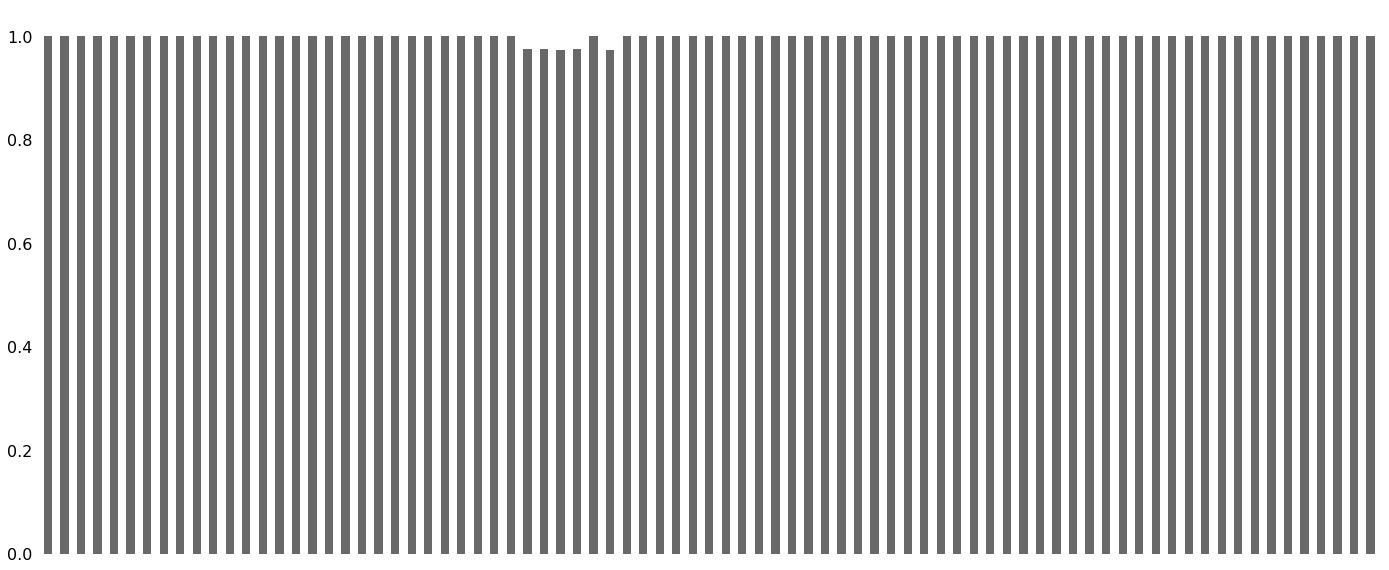

In [1987]:
##Lets check whether we still have some missing values in the data
msno.bar(train_mean_imputed);

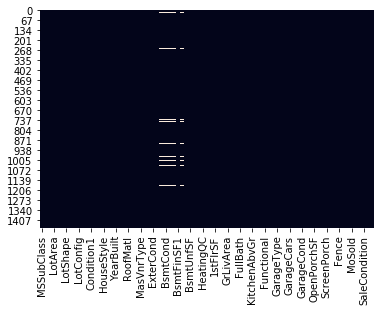

In [1988]:
##Lets check whether we still have some missing values in the data
sns.heatmap(train_mean_imputed.isnull(), cbar=False)

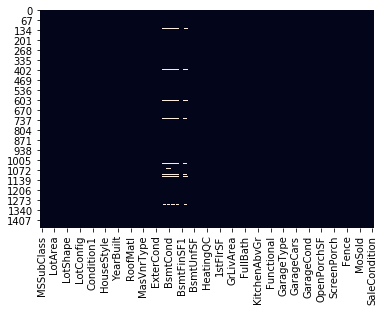

In [1989]:
##Lets check whether we still have some missing values in test data
sns.heatmap(test_mean_imputed.isnull(), cbar=False)

> Based on the two heat maps above after imputation with mean, we still have a few columns (Basement columns) with missing values and this is because these columns are categorical and the method we used (mean imputation) only fills the numeric columns.

>We still have to fill the missing values in these categorical columns. We can do this by either:
- Mode imputation, or 
- Zero imputation

>The remaining missing values we shall fill them with zero values using the zero imputation

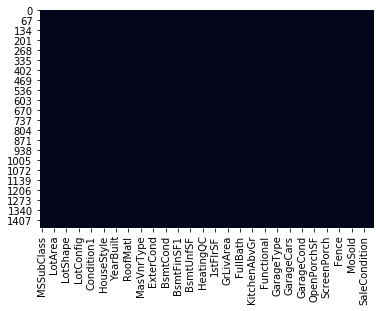

In [1993]:
# Lets fill the remaining missing values with zeros and then after plot a heat map to check for any evidence of null values
train_zero_imputed = train_mean_imputed.fillna(0)
sns.heatmap(train_zero_imputed.isnull(), cbar=False)

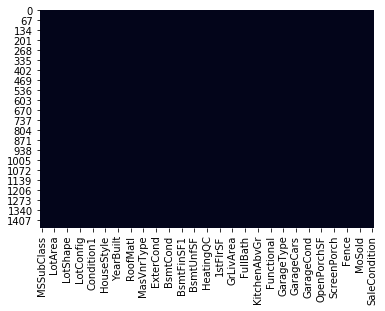

In [1995]:
## lets do zero impution and check for the evidence of no missing values
test_zero_imputed = test_mean_imputed.fillna(0)
sns.heatmap(test_zero_imputed.isnull(), cbar=False)

> From the visuals generated above, we can tell that our data sets do not contain any missing values, since there are no bands seen in the heat map plots. The bands in heatmap show positions of the missing values in data.

> Our data is now clean in terms of missing values, so we can explore more to understand how variables correlate to each other and to the target variable (SalePrice).


**Correlation Between Attributes**

`Converting categorical columns to numeric`
> Since our data now is free from null/missing values, lets us now concvert categorical values to numeric values. 